# Code Samples

In [ ]:
import sympy as sp
import numpy
import pandas

In [14]:
sp.init_printing()

In [21]:
x, y, z, k1, k2, k3 = sp.symbols("x, y, z, k1, k2, k3")

In [16]:
sp.solveset(sp.sin(x) - 1, x)

In [17]:
matrix = sp.Matrix([sp.sin(x) -1, sp.cos(y) -1 ])
matrix

⎡sin(x) - 1⎤
⎢          ⎥
⎣cos(y) - 1⎦

In [18]:
sp.solve(matrix)

In [26]:
kinetics = sp.Matrix([k1*x*y - 3, k2*x/(1 -x) - 4])

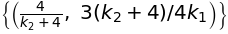

In [27]:
sp.nonlinsolve(kinetics, [x,y])

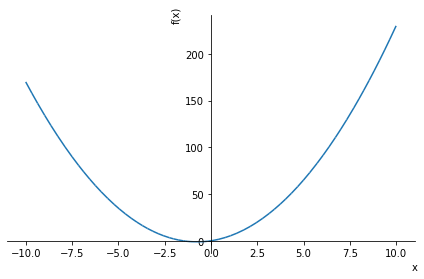

In [30]:
sp.plot(2*x**2 + 3*x)

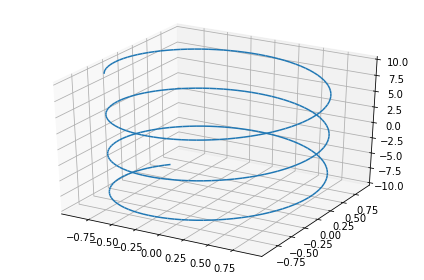

In [32]:
from sympy.plotting import plot3d_parametric_line

t = sp.symbols('t')
alpha = [sp.cos(t), sp.sin(t), t]
plot3d_parametric_line(*alpha)


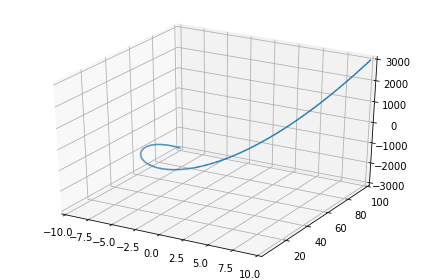

In [42]:
# Plots for the reaction flux
#  x + y -> z; k1*x*y
flux = sp.Matrix([x, y, k1*x*y])
flux_plot = flux.subs({k1: 3})
plot3d_parametric_line(x, x**2, 3*x**3)

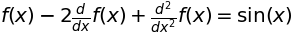

In [48]:
f, g = sp.symbols('f g', cls=sp.Function)
diffeq = sp.Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sp.sin(x))
diffeq

In [52]:
result = sp.dsolve(diffeq, f(x))

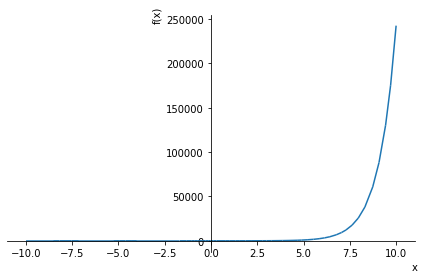

In [68]:
syms = list(result.free_symbols)
syms[0]
result1 = result.subs({syms[0]: 1, syms[1]: 1})
sp.plot(result1.rhs)

In [51]:
sp.solve(x**2 - 2*x + 1, x)

In [67]:
result1.rhs

# Workflow for Solving LTI Systems
1. Given $A, B, C$, find 
   1. $e^{At}$
   1. $\int_0^t e^{A(t - \tau)} u(\tau) d \tau$ for 
   $u(\tau) \in \{ \delta(t), 1(t), t \} $
   1. $x(t)$
   1. $y(t)$

1. Plot $x$, $y$

1. Solve for observability, controllability

# Workflow for Reaction Networks
1. Simulate the original model
1. Convert model to sympy
1. Get symbolic Jaccobian
1. Construct LTI models for different points in state space